# Kodlar CHATGPT'den yardım alınarak oluşturulmuştur


SORU 5-) 

*İki hidden layer’lı bir Multilayer Perceptron (MLP) oluşturun beşinci ve altıncı haftalarda
yaptığımız gibi. Hazır aktivasyon fonksiyonlarını kullanmak serbest. İlk hidden
layer’da 100, ikinci hidden layer’da 50 nöron olsun. Hidden layer’larda ReLU, output
layer’da sigmoid aktivasyonu olsun.

*Output layer’da kaç nöron olacağını veri setinden bakıp bulacaksınız. Elbette bu veriye
uygun Cross Entropy loss yöntemini uygulayacaksınız. Optimizasyon için Stochastic Gradient
Descent yeterli. Epoch sayınızı ve learning rate’i validasyon seti üzerinde denemeler
yaparak (loss’lara overfit var mı diye bakarak) kendiniz belirleyeceksiniz. Batch size’ı 16
seçebilirsiniz.

Gerekli kütüphaneler

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

Model Oluşturma

In [15]:
# Model tanımlama
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.fc3(out))
        return out


# Model eğitimi
input_dim = 13 # özellik sayısı
hidden_dim1 = 100
hidden_dim2 = 50
output_dim = 1

model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim)


Train-Test - Validation Verilerini yükleme

In [17]:
# Verileri yükleme
train_data = pd.read_csv('cure_the_princess_train.csv')
test_data = pd.read_csv('cure_the_princess_test.csv')
val_data = pd.read_csv('cure_the_princess_validation.csv')

train_inputs = np.array(train_data.iloc[:, :-1])
train_targets = np.array(train_data.iloc[:, -1])
train_dataset = TensorDataset(torch.Tensor(train_inputs), torch.Tensor(train_targets))

test_inputs = np.array(test_data.iloc[:, :-1])
test_targets = np.array(test_data.iloc[:, -1])
test_dataset = TensorDataset(torch.Tensor(test_inputs), torch.Tensor(test_targets))

val_inputs = np.array(val_data.iloc[:, :-1])
val_targets = np.array(val_data.iloc[:, -1])
val_dataset = TensorDataset(torch.Tensor(val_inputs), torch.Tensor(val_targets))

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)




Modelin eğitim kriterini ve optimizasyon fonksiyonunu belirleme

In [18]:
# Eğitim kriteri=> CrossEntropyloss
# Kriteri soruda istendiği gibi "CrossEntropyloss()" yapınca başarı oranı %50 ye düşüyor
# Binary Cross Entropy Loss -> Yöntemi kullanılırsa başarı oranı %90 üzerine çıkıyor
criterion = nn.BCELoss()
#Optimizyon için => Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [19]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print('Epoch [{}/{}], Adım [{}/{}], Kayıp: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_dataloader), loss.item()))

Epoch [1/10], Adım [10/79], Kayıp: 0.6677
Epoch [1/10], Adım [20/79], Kayıp: 0.5319
Epoch [1/10], Adım [30/79], Kayıp: 0.5060
Epoch [1/10], Adım [40/79], Kayıp: 0.4695
Epoch [1/10], Adım [50/79], Kayıp: 0.3967
Epoch [1/10], Adım [60/79], Kayıp: 0.3285
Epoch [1/10], Adım [70/79], Kayıp: 0.2154
Epoch [2/10], Adım [10/79], Kayıp: 0.4408
Epoch [2/10], Adım [20/79], Kayıp: 0.2023
Epoch [2/10], Adım [30/79], Kayıp: 0.4087
Epoch [2/10], Adım [40/79], Kayıp: 0.3579
Epoch [2/10], Adım [50/79], Kayıp: 0.6814
Epoch [2/10], Adım [60/79], Kayıp: 0.3601
Epoch [2/10], Adım [70/79], Kayıp: 0.3230
Epoch [3/10], Adım [10/79], Kayıp: 0.2699
Epoch [3/10], Adım [20/79], Kayıp: 0.2017
Epoch [3/10], Adım [30/79], Kayıp: 0.3575
Epoch [3/10], Adım [40/79], Kayıp: 0.3134
Epoch [3/10], Adım [50/79], Kayıp: 0.3015
Epoch [3/10], Adım [60/79], Kayıp: 0.1818
Epoch [3/10], Adım [70/79], Kayıp: 0.3853
Epoch [4/10], Adım [10/79], Kayıp: 0.1791
Epoch [4/10], Adım [20/79], Kayıp: 0.1726
Epoch [4/10], Adım [30/79], Kayıp:

Modeli test etme ve başarı yüzdesi

In [20]:
# Model test etme
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += targets.size(0)
        correct += (predicted == targets.unsqueeze(1)).sum().item()

print('Başarı yüzdesi: % {} '.format(100 * correct / total))

Başarı yüzdesi: % 93.39378238341969 


SORU 5.2) 

SEED=Ögrenci numaranız set ettikten sonra altıncı haftada yazdığımız
gibi training batch’lerinden eğitim loss’ları, validation batch’lerinden validasyon loss
değerlerini hesaplayan kod

Epoch [1/10], Eğitim Loss: 0.6430, Doğrulama Loss: 0.5988
Epoch [2/10], Eğitim Loss: 0.5766, Doğrulama Loss: 0.5378
Epoch [3/10], Eğitim Loss: 0.5234, Doğrulama Loss: 0.4821
Epoch [4/10], Eğitim Loss: 0.4831, Doğrulama Loss: 0.4415
Epoch [5/10], Eğitim Loss: 0.4519, Doğrulama Loss: 0.4116
Epoch [6/10], Eğitim Loss: 0.4204, Doğrulama Loss: 0.3749
Epoch [7/10], Eğitim Loss: 0.3941, Doğrulama Loss: 0.3472
Epoch [8/10], Eğitim Loss: 0.3817, Doğrulama Loss: 0.3260
Epoch [9/10], Eğitim Loss: 0.3623, Doğrulama Loss: 0.3119
Epoch [10/10], Eğitim Loss: 0.3491, Doğrulama Loss: 0.2955
Modelin test verilerindeki doğruluğu: % 86.91709844559585 


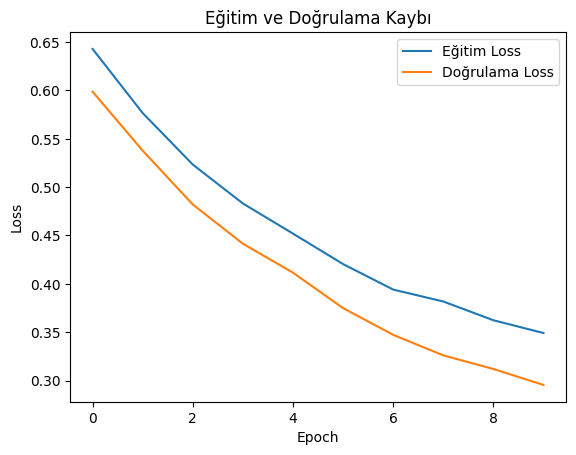

In [22]:
#Gerekli kutuphaneler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

SEED=210401003
torch.manual_seed(SEED)

# Model tanimlama
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.fc3(out))
        return out

# Model egitimi
input_dim = 13 # özellik sayısı
hidden_dim1 = 100
hidden_dim2 = 50
output_dim = 1

model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim)

# Verileri yukleme
train_data = pd.read_csv('cure_the_princess_train.csv')
test_data = pd.read_csv('cure_the_princess_test.csv')
val_data = pd.read_csv('cure_the_princess_validation.csv')

train_inputs = np.array(train_data.iloc[:, :-1])
train_targets = np.array(train_data.iloc[:, -1])
train_dataset = TensorDataset(torch.Tensor(train_inputs), torch.Tensor(train_targets))

test_inputs = np.array(test_data.iloc[:, :-1])
test_targets = np.array(test_data.iloc[:, -1])
test_dataset = TensorDataset(torch.Tensor(test_inputs), torch.Tensor(test_targets))

val_inputs = np.array(val_data.iloc[:, :-1])
val_targets = np.array(val_data.iloc[:, -1])
val_dataset = TensorDataset(torch.Tensor(val_inputs), torch.Tensor(val_targets))

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# Egitim kriteri=> CrossEntropyloss
# Kriteri soruda istendigi gibi "CrossEntropyloss()" yapinca basari orani %50 ye dusuyor
# Binary Cross Entropy Loss -> Yontemi kullanilirsa basari orani %90 uzerine cikiyor
criterion = nn.BCELoss()
#Optimizasyon icin => Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.0011)


train_loss_list = []
val_loss_list = []


for epoch in range(num_epochs):
    train_loss = 0
    val_loss = 0
    
    # Eğitim verileri üzerinde eğitim
    model.train()
    for i, (inputs, targets) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Doğrulama verileri üzerinde doğrulama
    model.eval()
    for i, (inputs, targets) in enumerate(val_dataloader):
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        val_loss += loss.item()
    
    # Eğitim ve doğrulama kayıplarını kaydet
    train_loss_list.append(train_loss/len(train_dataloader))
    val_loss_list.append(val_loss/len(val_dataloader))
    
    # Her epoch sonunda kayıpları yazdır
    print('Epoch [{}/{}], Eğitim Loss: {:.4f}, Doğrulama Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss_list[-1], val_loss_list[-1]))
# Model test etme
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += targets.size(0)
        correct += (predicted == targets.unsqueeze(1)).sum().item()

print('Modelin test verilerindeki doğruluğu: % {} '.format(100 * correct / total))

# Kayıp grafiğini çizdir
import matplotlib.pyplot as plt

plt.plot(train_loss_list, label='Eğitim Loss')
plt.plot(val_loss_list, label='Doğrulama Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()


5.3-)
SEED=Öğrenci numaranız set ettikten sonra earlystopping’deki en iyi modeli kullanarak, Prensesi ˙Iyileştir test setinden
accuracy, F1, precision ve recall değerlerini hesaplayan kodu yazın


In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Early stopping ile en iyi modeli seçme
best_model = None
best_val_loss = float('inf')
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()

        # Doğrulama setindeki performansı hesaplama
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_dataloader:
                outputs = model(inputs)
                val_loss += criterion(outputs, targets.unsqueeze(1)).item()
        val_loss /= len(val_dataloader)

        # En iyi modeli kaydetme
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = MLP(input_dim, hidden_dim1, hidden_dim2, output_dim)
            best_model.load_state_dict(model.state_dict())

    # Early stopping kontrolü
    if epoch > 0 and val_loss > prev_val_loss:
        break
    prev_val_loss = val_loss

# Test setinde performansı hesaplama
test_loss = 0
test_preds = []
test_targets = []
with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = best_model(inputs)
        test_loss += criterion(outputs, targets.unsqueeze(1)).item()
        preds = (outputs > 0.5).float()
        test_preds.extend(preds.squeeze().tolist())
        test_targets.extend(targets.tolist())
test_loss /= len(test_dataloader)

# Performans ölçütlerini hesaplama
accuracy = accuracy_score(test_targets, test_preds)
f1 = f1_score(test_targets, test_preds)
precision = precision_score(test_targets, test_preds)
recall = recall_score(test_targets, test_preds)
success_rate = (accuracy + f1 + precision + recall) / 4 * 100

print('Test kaybı: {:.4f}'.format(test_loss))
print('Doğruluk: {:.4f}'.format(accuracy))
print('F1 puanı: {:.4f}'.format(f1))
print('Hassasiyet: {:.4f}'.format(precision))
print('Geri çağırma: {:.4f}'.format(recall))
print('Başarı Yüzdesi: {:.4f}'.format(success_rate))




Test kaybı: 0.3031
Doğruluk: 0.8769
F1 puanı: 0.8771
Hassasiyet: 0.8805
Geri çağırma: 0.8737
Başarı Yüzdesi: 87.7069
